Original Image: 


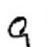


Midpoint of Image
27 27

Bounded Box around digit:


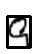

31

Original Scale Ratio:
0.57

Bounded Box around digit:


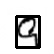


Bounded Box around digit:


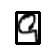


Resized Digit:


(41, 23)
54 54

Output:


In [6]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def findBoundary(sample):
  canny = cv2.Canny(sample,100,200)
  test = np.copy(sample)
  contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  #get coordinates for rectangle and draw bounding box
  for i in contours:
    x,y,w,h = cv2.boundingRect(i)
    cv2.rectangle(test, (x, y), (x+w, y+h), (0, 255, 0), 2)
  print('\nBounded Box around digit:')
  cv2_imshow(test)
  return x,y,w,h  

def scale(img):
  height,width = img.shape
  thresh = 150
  #midpont of image
  midX = int(width / 2)
  midY = int(height / 2)
  print('\nMidpoint of Image')
  print(midX,midY)
  x,y,w,h = findBoundary(img) 
  #print(x,y,x+w,y+h)
  #print(w,h)
  
  digit_h = h
  orig_scl = round(digit_h / height,2)
  target_height = 0.9 * height
  print(digit_h)
  print('\nOriginal Scale Ratio:')
  print(orig_scl) 
  target_scale = round(0.9 - orig_scl,2)
  #print(target_scale)
  scale_ratio = 1 + target_scale
  #moving to center of the image
  #find existing mid point of bounding box
  bound_midX = int(x + (w / 2))
  bound_midY = int(y + (h / 2))
  #print(bound_midX, bound_midY)
  dif_X = midX - bound_midX
  dif_Y = midY - bound_midY
  #print(dif_X,dif_Y)
  
  #manual translating to center
  if dif_X > 0:               #shifting right
    for i in range(y+h,y-2,-1):
      count = 0
      for j in range(x+w,x-2,-1):
        count += 1
        if count >= 0:
          img[i,j+dif_X] = img[i,j]
          img[i,j] = 255
        #else:
        #  img[i,j+dif_X] = img[i,j]
  if dif_X < 0:               #shifting left
    for i in range(y,y+h):
      count = 0
      for j in range(x,x+w):
        count += 1
        if count >= 0:
          img[i,j+dif_X] = img[i,j]
          img[i,j] = 255
        #else:
        #  img[i,j+dif_X] = img[i,j]
  #bounding rectangle again
  x,y,w,h = findBoundary(img)
  if dif_Y < 0 :               #shifting top
    for i in range(y-2,y+2+h):
      count = 0
      for j in range(x-2,x+2+w):
        count += 1
        if count >= 0:
          img[i+dif_Y,j] = img[i,j]
          img[i,j] = 255
        #else:
        #  img[i+dif_Y,j] = img[i,j]
  if dif_Y > 0 :               #shifting bottom
    for i in range(y+2+h,y-2,-1):
      count = 0
      for j in range(x+2+w,x-2,-1):
        count += 1
        if count >= 0:
          img[i+dif_Y,j] = img[i,j]
          img[i,j] = 255
  #bounding rectangle again
  x,y,w,h = findBoundary(img)
  digit = np.ones([h,w])*255
  a = 0
  for i in range(y,y+h):
    b = 0
    for j in range(x,x+w):
      digit[a,b] = img[i,j]
      b += 1
    a += 1

  res = cv2.resize(digit, None, fx=1, fy=scale_ratio, interpolation = cv2.INTER_CUBIC)
  print('\nResized Digit:')
  cv2_imshow(res)
  print(res.shape)
  print(height,width)

  #creating blank white image of the size of original image
  blank = np.ones([height,width])*255

  #vis = np.concatenate((blank, res), axis=0)
  output = res                          
  print('\nOutput:') 
  return output

image = cv2.imread('21.jpg', 0)
print('Original Image: ')
cv2_imshow(image)
cv2_imshow(scale(image))